# 1-Introduction

Nama: Rhesa Akbar Elvarettano

Batch: SBY-002

Objective: Melakukan analisa data untuk meningkatkan profit pada suatu kedai kopi dan teh


Link Tableau: https://public.tableau.com/app/profile/rhesa.akbar/viz/CoffeeandTeaShopProfitDashbord/Dashboard1



# 2-Import Library

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
pd.set_option("display.max.columns", None)

# 3-Identifikasi Masalah

## 3.1-Penjabaran problem statement


Specific: Meningkatkan profit penjualan 

Measurable: profit penjualan Meningkat sebesar 10%  

Achievable: Menentukan produk dan lokasi paling profit dari tidak profit sehingga kita bisa memprioritaskan menjual barang dengan produk dan lokasi paling profit sehingga dapat menigkatkan profit 10%

Relevant: Meningkatkan penjualan dapat menghasilkan profit yang lebih tinggi.

Timebound: Mencapai target profit pada tahun 2016





## 3.2-Problem Statement:

Tujuannya untuk meningkatkan profit dengan target sebesar 10% pada tahun 2016. Hal itu dapat dicapai dengan fokus meningkatkan penjualan dengan menentukan produk dan lokasi yang paling profit dari pada yang tidak profit sehingga dapat meningkatkan profit 10%.

## 3.3-Defining the problem dengan metode 5W+1H:

1. Produk apa paling banyak memberikan keuntungan?

2. Produk apa paling banyak terjual?

3. Dimana state paling banyak memberikan keuntungan?

4. Dimana state paling banyak melakukan penjualan?

5. Dari 5 state paling banyak profit, produk apa yang paling profit dari masing-masing state?

6. Dimana state paling banyak mendapatkan profit dari produk colombian?

7. Kapan produk Colombian paling banyak profit?

8. Statistik Inferential: Apakah memang negara New York dan California yang memiliki profit paling tinggi pada produk colomnian tersebut memiliki perbedaan yg signifikan, coba cek menggunakan two sampel

9. Statistik Deskriptif dengan Central Tendency

# 4-Data Loading

[Link Dataset](https://www.kaggle.com/datasets/amruthayenikonda/coffee-chain-sales-dataset/)

In [7]:
# Membaca data dari file CSV
df = pd.read_csv('Coffee_Chain_Sales.csv')

In [8]:
# Tampilkan Data
df

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Date,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,Product_type,Product,Profit,Sales,State,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type
0,303,51,-35,10/1/2012,503,71,Major Market,Central,46,Leaves,Herbal Tea,Lemon,-5,122,Colorado,30,60,30,90,76,Decaf
1,970,52,-24,10/1/2012,405,71,Major Market,Central,17,Leaves,Herbal Tea,Mint,26,123,Colorado,30,60,50,90,45,Decaf
2,409,43,-22,10/2/2012,419,64,Major Market,South,13,Leaves,Herbal Tea,Lemon,28,107,Texas,30,60,50,90,36,Decaf
3,850,38,-15,10/3/2012,871,56,Major Market,East,10,Leaves,Tea,Darjeeling,35,94,Florida,40,60,50,100,21,Regular
4,562,72,6,10/4/2012,650,110,Major Market,West,23,Leaves,Tea,Green Tea,56,182,California,20,60,50,80,54,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,775,250,133,8/23/2015,1820,251,Small Market,West,70,Leaves,Tea,Earl Grey,233,534,Nevada,180,180,100,360,94,Regular
1058,971,88,48,8/24/2015,817,133,Small Market,West,29,Leaves,Tea,Earl Grey,108,236,Oregon,60,100,60,160,60,Regular
1059,775,294,-285,8/25/2015,8252,-294,Small Market,West,111,Leaves,Tea,Green Tea,-605,33,Nevada,210,-210,-320,0,145,Regular
1060,503,134,80,8/26/2015,690,186,Small Market,West,41,Leaves,Tea,Green Tea,180,341,Oregon,90,140,100,230,65,Regular


In [59]:
unique_products = df['profit'].unique()
unique_products

array([  -5,   26,   28,   35,   56,   31,   21,    7,   37,   33,   24,
         -7,    1,   -2,   12,   -6,   45,   47,   36,   64,   76,   48,
         27,   -8,   44,   15,   29,   30,   34,   14,   20,   49,   13,
         52,   23,   50,   53,   -3,   16,   17,   39,   42,   83,   46,
         10,   55,  -10,   18,   -9,   67,   70,   95,  113,   71,   40,
        -12,   65,   22,   43,   73,   19,   77,   74,   79,   -4,   25,
          0,   57,   38,  -20,    6,   32,    8,  117,   85,  -30,    9,
        -26,   11,    5,    2,  -39,  -13,    3,  -11,   58,  -16,   82,
         68,   86,  -18,  -24,   78,   59,   51,  116,   96,   88,  185,
        133,   87,  174,  127,   62,   89,  188,   72,   66,  -15,  121,
        275,  197,  110,  129,  258,   92,  105,  132,  126,  279,  107,
         98,  -22,  180,  114,  115,  122,  171,  181,  156,   60,  348,
        247, -202,  435, -170,  134,   63,  324,  236,  108,  381,  204,
       -156,   84,  390,  271, -224,  312,  309, -1

In [10]:
# Cek data 10 teratas
df.head(10)

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Date,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,Product_type,Product,Profit,Sales,State,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type
0,303,51,-35,10/1/2012,503,71,Major Market,Central,46,Leaves,Herbal Tea,Lemon,-5,122,Colorado,30,60,30,90,76,Decaf
1,970,52,-24,10/1/2012,405,71,Major Market,Central,17,Leaves,Herbal Tea,Mint,26,123,Colorado,30,60,50,90,45,Decaf
2,409,43,-22,10/2/2012,419,64,Major Market,South,13,Leaves,Herbal Tea,Lemon,28,107,Texas,30,60,50,90,36,Decaf
3,850,38,-15,10/3/2012,871,56,Major Market,East,10,Leaves,Tea,Darjeeling,35,94,Florida,40,60,50,100,21,Regular
4,562,72,6,10/4/2012,650,110,Major Market,West,23,Leaves,Tea,Green Tea,56,182,California,20,60,50,80,54,Regular
5,712,0,-29,10/5/2012,430,43,Small Market,Central,0,Beans,Espresso,Decaf Espresso,31,43,Iowa,0,60,60,60,12,Decaf
6,860,47,-29,10/6/2012,375,64,Small Market,East,15,Beans,Espresso,Decaf Espresso,21,111,Connecticut,30,60,50,90,43,Decaf
7,918,27,-39,10/7/2012,859,39,Small Market,South,7,Beans,Coffee,Decaf Irish Cream,21,66,Oklahoma,30,60,60,90,18,Decaf
8,775,31,-43,10/8/2012,1000,37,Small Market,West,9,Beans,Coffee,Decaf Irish Cream,7,68,Nevada,30,60,50,90,30,Decaf
9,435,40,-23,10/9/2012,881,59,Small Market,West,11,Beans,Espresso,Decaf Espresso,37,99,Utah,20,60,60,80,22,Decaf


In [11]:
# Cek data 10 terbawah
df.tail(10)

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Date,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,Product_type,Product,Profit,Sales,State,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type
1052,253,115,46,8/18/2015,1166,174,Small Market,West,37,Leaves,Herbal Tea,Chamomile,156,308,Washington,100,160,110,260,69,Decaf
1053,702,224,118,8/19/2015,1191,310,Small Market,West,73,Leaves,Herbal Tea,Lemon,288,569,Nevada,210,280,170,490,116,Decaf
1054,503,81,28,8/20/2015,551,104,Small Market,West,26,Leaves,Herbal Tea,Lemon,98,197,Oregon,70,100,70,170,38,Decaf
1055,775,127,61,8/21/2015,830,185,Small Market,West,40,Leaves,Herbal Tea,Mint,181,332,Nevada,120,170,120,290,63,Decaf
1056,775,247,169,8/22/2015,1744,329,Small Market,West,81,Leaves,Tea,Darjeeling,319,614,Nevada,180,240,150,420,114,Regular
1057,775,250,133,8/23/2015,1820,251,Small Market,West,70,Leaves,Tea,Earl Grey,233,534,Nevada,180,180,100,360,94,Regular
1058,971,88,48,8/24/2015,817,133,Small Market,West,29,Leaves,Tea,Earl Grey,108,236,Oregon,60,100,60,160,60,Regular
1059,775,294,-285,8/25/2015,8252,-294,Small Market,West,111,Leaves,Tea,Green Tea,-605,33,Nevada,210,-210,-320,0,145,Regular
1060,503,134,80,8/26/2015,690,186,Small Market,West,41,Leaves,Tea,Green Tea,180,341,Oregon,90,140,100,230,65,Regular
1061,435,20,-22,8/27/2015,218,25,Small Market,West,7,Leaves,Tea,Green Tea,-22,48,Utah,10,20,0,30,40,Regular


In [12]:
# Cek jumlah baris dan kolom & cek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Area Code                               1062 non-null   int64 
 1   Cogs                                    1062 non-null   int64 
 2   DifferenceBetweenActualandTargetProfit  1062 non-null   int64 
 3   Date                                    1062 non-null   object
 4   Inventory Margin                        1062 non-null   int64 
 5   Margin                                  1062 non-null   int64 
 6   Market_size                             1062 non-null   object
 7   Market                                  1062 non-null   object
 8   Marketing                               1062 non-null   int64 
 9   Product_line                            1062 non-null   object
 10  Product_type                            1062 non-null   object
 11  Prod

In [13]:
df.describe()

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Inventory Margin,Margin,Marketing,Profit,Sales,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses
count,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000
mean,587.030132,82.399247,0.387006,815.175141,102.423729,30.433145,60.556497,191.049906,71.676083,96.817326,60.169492,168.493409,53.836158
std,225.299162,64.824295,44.331180,916.156386,91.286704,25.963448,100.516593,148.270317,65.701583,89.467176,77.824869,145.955171,31.703526
min,203.000000,0.000000,-369.000000,-3534.000000,-294.000000,0.000000,-605.000000,21.000000,0.000000,-210.000000,-320.000000,0.000000,11.000000
25%,425.000000,41.000000,-15.000000,447.000000,51.000000,13.000000,16.250000,98.000000,30.000000,50.000000,20.000000,80.000000,33.000000
50%,573.000000,57.000000,-3.000000,659.000000,73.000000,22.000000,39.500000,133.000000,50.000000,70.000000,40.000000,120.000000,46.000000
75%,774.000000,101.000000,13.000000,968.000000,130.000000,40.750000,87.000000,227.000000,90.000000,120.000000,80.000000,210.000000,66.000000
max,985.000000,294.000000,249.000000,8252.000000,526.000000,122.000000,646.000000,815.000000,380.000000,580.000000,470.000000,960.000000,156.000000


# 5.-Data Exploration


In [14]:
# Cek White Space
df.columns

Index(['Area Code', 'Cogs', 'DifferenceBetweenActualandTargetProfit', 'Date',
       'Inventory Margin', 'Margin', 'Market_size', 'Market', 'Marketing',
       'Product_line', 'Product_type', 'Product', 'Profit', 'Sales', 'State',
       'Target_cogs', 'Target_margin', 'Target_profit', 'Target_sales ',
       'Total_expenses', 'Type'],
      dtype='object')

In [15]:
# Cek apakah ada missing value
df.isna().sum()

Area Code                                 0
Cogs                                      0
DifferenceBetweenActualandTargetProfit    0
Date                                      0
Inventory Margin                          0
Margin                                    0
Market_size                               0
Market                                    0
Marketing                                 0
Product_line                              0
Product_type                              0
Product                                   0
Profit                                    0
Sales                                     0
State                                     0
Target_cogs                               0
Target_margin                             0
Target_profit                             0
Target_sales                              0
Total_expenses                            0
Type                                      0
dtype: int64

Insight: Tidak ada missing value

In [16]:
# Untuuk mengecek baris yang duplicate
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1057    False
1058    False
1059    False
1060    False
1061    False
Length: 1062, dtype: bool

In [17]:
# Cek data duplicate pada semua data
df.duplicated().sum()

0

Insight: data tidak ada yang duplicate

# 6-Data Cleaning

## 6.1- Merubah Nama Kolom

In [18]:
# Menghapus white space pada nama kolom
df.columns = df.columns.str.strip()
# Menghapus lower case pada nama kolom
df.columns = df.columns.str.lower()
# Menghapus spasi menjadi _ pada nama kolom
df.columns = df.columns.str.replace(' ', '_')

df

,area_code,cogs,differencebetweenactualandtargetprofit,date,inventory_margin,margin,market_size,market,marketing,product_line,product_type,product,profit,sales,state,target_cogs,target_margin,target_profit,target_sales,total_expenses,type
0,303,51,-35,10/1/2012,503,71,Major Market,Central,46,Leaves,Herbal Tea,Lemon,-5,122,Colorado,30,60,30,90,76,Decaf
1,970,52,-24,10/1/2012,405,71,Major Market,Central,17,Leaves,Herbal Tea,Mint,26,123,Colorado,30,60,50,90,45,Decaf
2,409,43,-22,10/2/2012,419,64,Major Market,South,13,Leaves,Herbal Tea,Lemon,28,107,Texas,30,60,50,90,36,Decaf
3,850,38,-15,10/3/2012,871,56,Major Market,East,10,Leaves,Tea,Darjeeling,35,94,Florida,40,60,50,100,21,Regular
4,562,72,6,10/4/2012,650,110,Major Market,West,23,Leaves,Tea,Green Tea,56,182,California,20,60,50,80,54,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,775,250,133,8/23/2015,1820,251,Small Market,West,70,Leaves,Tea,Earl Grey,233,534,Nevada,180,180,100,360,94,Regular
1058,971,88,48,8/24/2015,817,133,Small Market,West,29,Leaves,Tea,Earl Grey,108,236,Oregon,60,100,60,160,60,Regular
1059,775,294,-285,8/25/2015,8252,-294,Small Market,West,111,Leaves,Tea,Green Tea,-605,33,Nevada,210,-210,-320,0,145,Regular
1060,503,134,80,8/26/2015,690,186,Small Market,West,41,Leaves,Tea,Green Tea,180,341,Oregon,90,140,100,230,65,Regular


## 6.2 Cleaning Missing Values

### 6.2.1-Menghilangkan missing value

In [19]:
# df.dropna()
# df = isna().sum()

### 6.2.2-Filling Missing Value

## 6.3-Inconsistent Type

### 6.3.1-Changing Data type date from object to datetime

In [20]:
# ubah kolom date tipe data objek ke tipe data datetime
df['date'] = pd.to_datetime(df['date'])

In [21]:
# Mengecek setelah mengganti tipe data date yg objek menjadi date time
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   area_code                               1062 non-null   int64         
 1   cogs                                    1062 non-null   int64         
 2   differencebetweenactualandtargetprofit  1062 non-null   int64         
 3   date                                    1062 non-null   datetime64[ns]
 4   inventory_margin                        1062 non-null   int64         
 5   margin                                  1062 non-null   int64         
 6   market_size                             1062 non-null   object        
 7   market                                  1062 non-null   object        
 8   marketing                               1062 non-null   int64         
 9   product_line                            1062 non-nul

## 6.4-Drop Column

In [22]:
# Cek kolom sebelum di drop
df.columns

Index(['area_code', 'cogs', 'differencebetweenactualandtargetprofit', 'date',
       'inventory_margin', 'margin', 'market_size', 'market', 'marketing',
       'product_line', 'product_type', 'product', 'profit', 'sales', 'state',
       'target_cogs', 'target_margin', 'target_profit', 'target_sales',
       'total_expenses', 'type'],
      dtype='object')

In [23]:
# Penghapusan kolom 'target_cogs', 'target_margin', 'target_profit' & 'target_sales karena tidak digunakan
df.drop(['target_cogs', 'target_margin', 'target_profit', 'target_sales'], axis=1, inplace= True)
df

,area_code,cogs,differencebetweenactualandtargetprofit,date,inventory_margin,margin,market_size,market,marketing,product_line,product_type,product,profit,sales,state,total_expenses,type
0,303,51,-35,2012-10-01,503,71,Major Market,Central,46,Leaves,Herbal Tea,Lemon,-5,122,Colorado,76,Decaf
1,970,52,-24,2012-10-01,405,71,Major Market,Central,17,Leaves,Herbal Tea,Mint,26,123,Colorado,45,Decaf
2,409,43,-22,2012-10-02,419,64,Major Market,South,13,Leaves,Herbal Tea,Lemon,28,107,Texas,36,Decaf
3,850,38,-15,2012-10-03,871,56,Major Market,East,10,Leaves,Tea,Darjeeling,35,94,Florida,21,Regular
4,562,72,6,2012-10-04,650,110,Major Market,West,23,Leaves,Tea,Green Tea,56,182,California,54,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,775,250,133,2015-08-23,1820,251,Small Market,West,70,Leaves,Tea,Earl Grey,233,534,Nevada,94,Regular
1058,971,88,48,2015-08-24,817,133,Small Market,West,29,Leaves,Tea,Earl Grey,108,236,Oregon,60,Regular
1059,775,294,-285,2015-08-25,8252,-294,Small Market,West,111,Leaves,Tea,Green Tea,-605,33,Nevada,145,Regular
1060,503,134,80,2015-08-26,690,186,Small Market,West,41,Leaves,Tea,Green Tea,180,341,Oregon,65,Regular


# 7-EDA

## 7.1- Produk apa paling banyak memberikan keuntungan?

In [24]:
# Mengelompokkan data berdasarkan 'Product' dan menghitung total profit setiap produk
total_profit_tiap_produk = df.groupby('product')['profit'].sum()
total_profit_tiap_produk

product
Amaretto              1352
Caffe Latte           2716
Caffe Mocha           4687
Chamomile             7006
Colombian            12932
Darjeeling            6976
Decaf Espresso        7039
Decaf Irish Cream     3201
Earl Grey             5975
Green Tea               89
Lemon                 7614
Mint                  1286
Regular Espresso      3438
Name: profit, dtype: int64

In [25]:
# Mengurutkan DataFrame berdasarkan total profit secara menurun
df_sorted_byprofit = total_profit_tiap_produk.sort_values(ascending=False)
df_sorted_byprofit

product
Colombian            12932
Lemon                 7614
Decaf Espresso        7039
Chamomile             7006
Darjeeling            6976
Earl Grey             5975
Caffe Mocha           4687
Regular Espresso      3438
Decaf Irish Cream     3201
Caffe Latte           2716
Amaretto              1352
Mint                  1286
Green Tea               89
Name: profit, dtype: int64

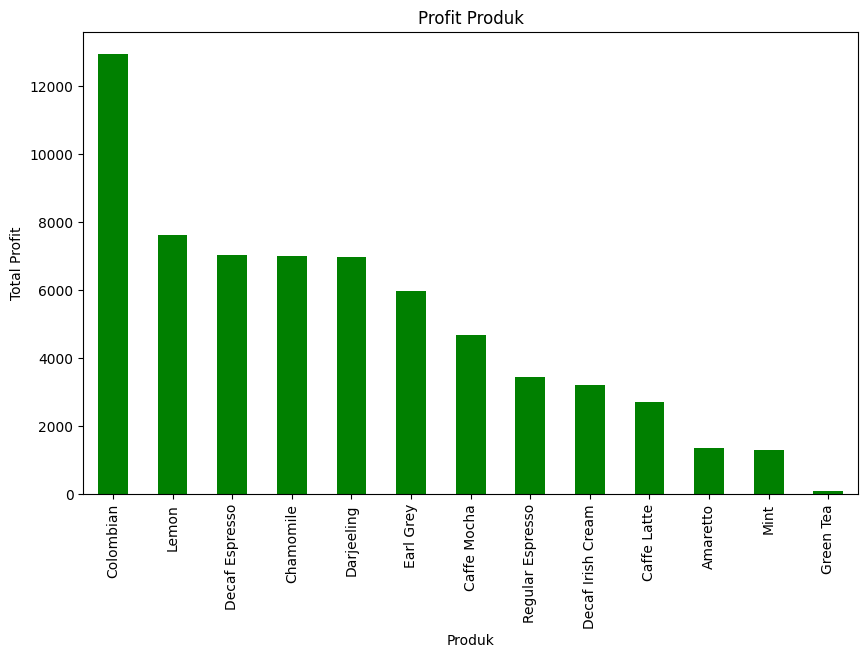

In [26]:
# Membuat plot bar untuk visualisasi profit produk
plt.figure(figsize=(10, 6))
df_sorted_byprofit.plot(kind='bar', color='green')
plt.title('Profit Produk')
plt.xlabel('Produk')
plt.ylabel('Total Profit')
plt.show()

Insight: 

Produk paling banyak menguntungkan adalah Colombian, kemudian yang kedua lemon, selanjutnya Decaf Espresso, Chamomile dan Darjeeling. 

## 7.2-Produk apa paling banyak terjual?

In [27]:
# Mengelompokkan data berdasarkan 'Product' dan menghitung total penjualan setiap produk
total_penjualan_tiap_produk = df.groupby('product')['sales'].sum()
total_penjualan_tiap_produk

product
Amaretto              6781
Caffe Latte           8665
Caffe Mocha          21716
Chamomile            19295
Colombian            30761
Darjeeling           17758
Decaf Espresso       18888
Decaf Irish Cream    14831
Earl Grey            16546
Green Tea             8520
Lemon                24048
Mint                  8342
Regular Espresso      6744
Name: sales, dtype: int64

In [28]:
# Mengurutkan DataFrame berdasarkan total sales
df_sorted_by_sales = total_penjualan_tiap_produk.sort_values(ascending=False)
df_sorted_by_sales

product
Colombian            30761
Lemon                24048
Caffe Mocha          21716
Chamomile            19295
Decaf Espresso       18888
Darjeeling           17758
Earl Grey            16546
Decaf Irish Cream    14831
Caffe Latte           8665
Green Tea             8520
Mint                  8342
Amaretto              6781
Regular Espresso      6744
Name: sales, dtype: int64

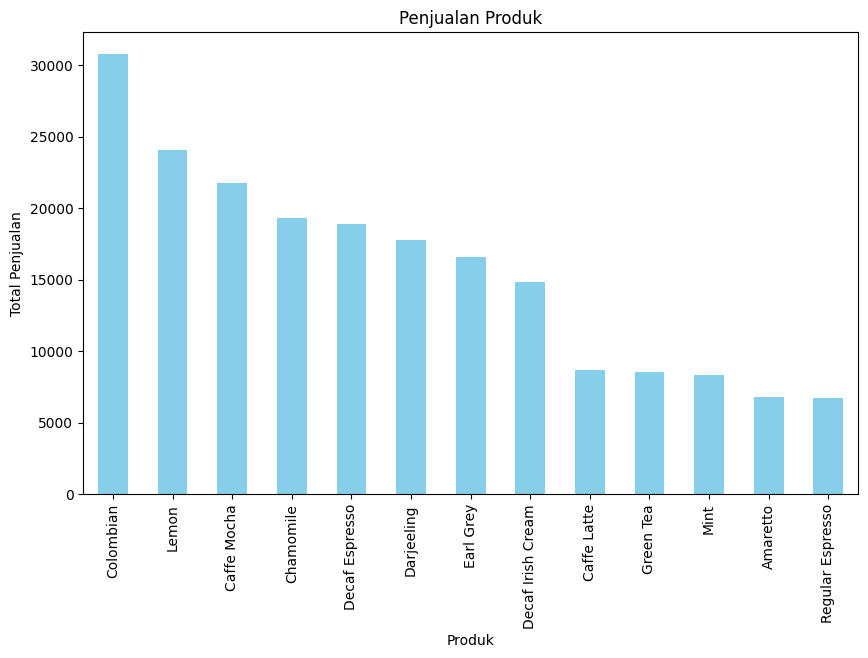

In [29]:
# Membuat plot bar untuk visualisasi penjualan produk
plt.figure(figsize=(10, 6))
df_sorted_by_sales.plot(kind='bar', color='skyblue')
plt.title('Penjualan Produk')
plt.xlabel('Produk')
plt.ylabel('Total Penjualan')
plt.show()

Insight: 

5 produk paling banyak terjual adalah yang pertama Colombian, selanjutnya Lemon, Caffe Mocha, Chamomile, dan Decaf Espresso.

## 7.3-Dimana state paling banyak memberikan keuntungan?

In [30]:
# Mengelompokkan data berdasarkan state dan menghitung total profit
totalprofit_state = df.groupby('state')['profit'].sum()
# Mengurutkan berdasarkan total profit
df_sorted_totalprofit_state = totalprofit_state.sort_values(ascending=False)
df_sorted_totalprofit_state

state
Illinois         7380
California       7340
New York         5565
Iowa             5412
Colorado         4450
Texas            3803
Massachusetts    3710
Oregon           3309
Washington       2865
Florida          2794
Ohio             2766
Nevada           2556
Oklahoma         2351
Utah             2199
Connecticut      2066
Louisiana        2026
Wisconsin        1937
Missouri          956
New Hampshire     610
New Mexico        216
Name: profit, dtype: int64

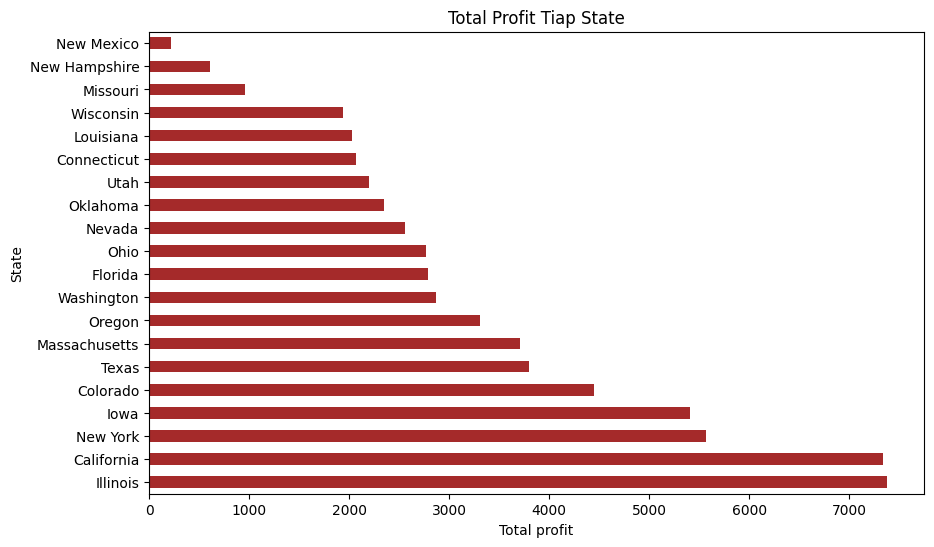

In [31]:
# Visualisasi keuntungan tiap state dengan Horizontal bar chart
plt.figure(figsize=(10, 6))
df_sorted_totalprofit_state.plot(kind='barh', color='brown')
plt.title('Total Profit Tiap State')
plt.xlabel('Total profit')
plt.ylabel('State')
plt.show()

Insight:

Dari visualisasi 5 state yang paling banyak memberikan keuntungan Illinois, California, New York, Iowa, & Colardo 

## 7.4-Dimana state paling banyak melakukan penjualan?

In [32]:
# Mengelompokkan data berdasarkan state dan menghitung total profit
totalsales_state = df.groupby('state')['sales'].sum()
# Mengurutkan berdasarkan total profit
df_sorted_totalsales_state = totalsales_state.sort_values(ascending=False)
df_sorted_totalsales_state

state
California       23032
New York         17731
Illinois         16812
Nevada           14822
Iowa             13359
Colorado         12112
Oregon           10661
Washington        9744
Utah              9159
Texas             9092
Florida           8825
Ohio              8787
Wisconsin         7839
Massachusetts     7339
Oklahoma          7298
Connecticut       6670
Louisiana         6193
Missouri          6072
New Mexico        3805
New Hampshire     3543
Name: sales, dtype: int64

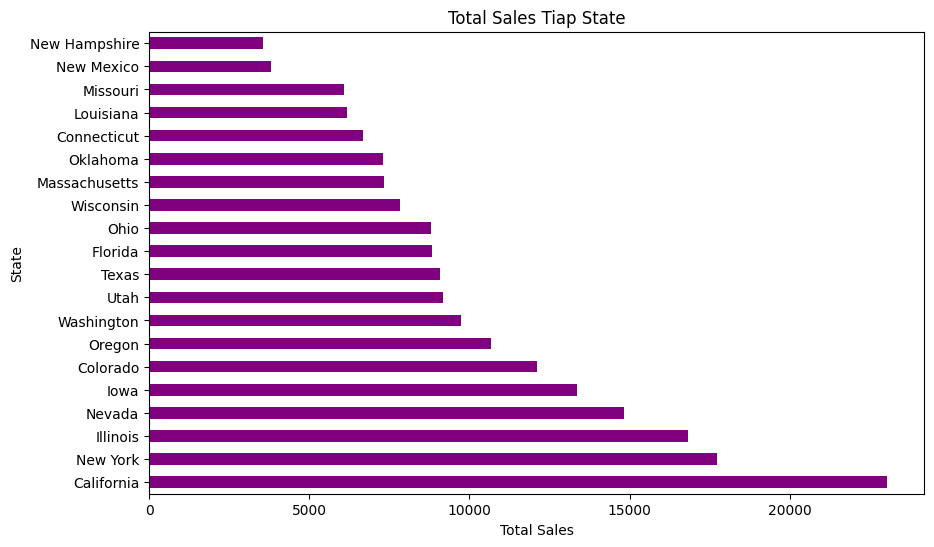

In [33]:
# Visualisasi sales tiap state dengan Horizontal bar chart
plt.figure(figsize=(10, 6))
df_sorted_totalsales_state.plot(kind='barh', color='purple')
plt.title('Total Sales Tiap State')
plt.xlabel('Total Sales')
plt.ylabel('State')
plt.show()

Insight:

Dari visualisasi 5 state yang paling banyak melakukan penjualan California, New York, Illinois, Iowa, & Colardo 

## 7.5-Dari 5 state paling banyak profit, produk apa yang paling profit dari masing-masing state?

In [34]:
# Illinois
# Filter produk di State Illinois
df_il = df[df['state'] == 'Illinois']
# Mengelompokkan data berdasarkan produk dan menghitung total keuntungan di Illinois
total_keuntungan_per_produk_il = df_il.groupby('product')['profit'].sum()
# Mengurutkan nilai keuntungan secara descending dan mengambil produk pertama
produk_tertinggi_il = total_keuntungan_per_produk_il.sort_values(ascending=False)
produk_tertinggi_il

product
Caffe Mocha          1580
Colombian            1125
Decaf Espresso       1080
Chamomile             975
Decaf Irish Cream     852
Mint                  716
Darjeeling            445
Earl Grey             401
Lemon                 206
Name: profit, dtype: int64

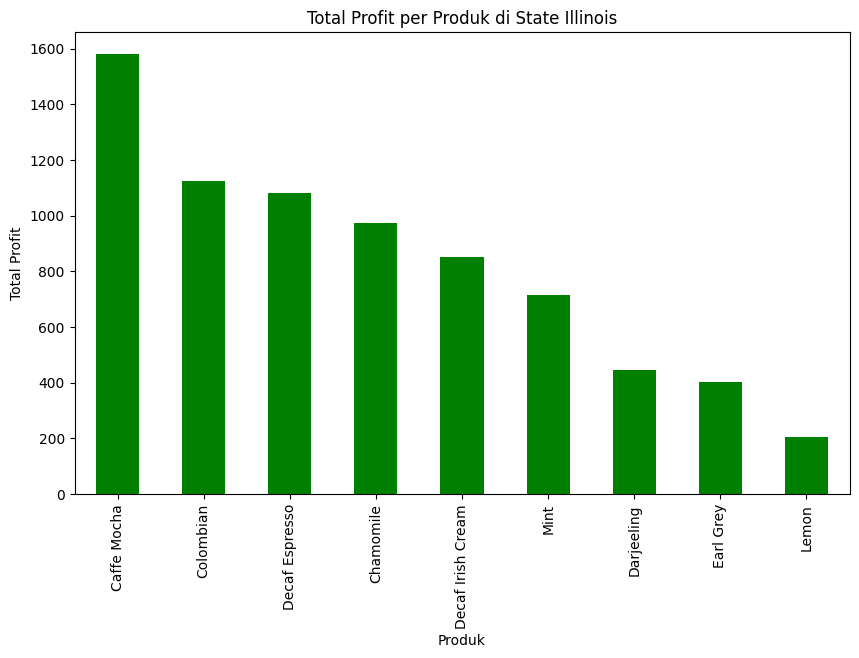

In [35]:
# Membuat plot bar untuk visualisasi total keuntungan per produk di Illinois
plt.figure(figsize=(10, 6))
produk_tertinggi_il.plot(kind='bar', color='green')
plt.title('Total Profit per Produk di State Illinois')
plt.xlabel('Produk')
plt.ylabel('Total Profit')
plt.show()

Insight: 

Produk dengan profit paling tinggi di illinois adalah Caffe Mocha

In [36]:
# California
# Filter produk di State California 
df_ca = df[df['state'] == 'California']
# Mengelompokkan data berdasarkan produk dan menghitung total keuntungan di CA
total_keuntungan_per_produk_ca = df_ca.groupby('product')['profit'].sum()
# Mengurutkan nilai keuntungan secara descending dan mengambil produk pertama
produk_tertinggi_ca = total_keuntungan_per_produk_ca.sort_values(ascending=False)
produk_tertinggi_ca

product
Colombian            1871
Decaf Espresso       1585
Lemon                1361
Caffe Latte          1080
Darjeeling            984
Chamomile             716
Earl Grey             445
Green Tea             403
Caffe Mocha           209
Mint                  204
Amaretto             -542
Decaf Irish Cream    -976
Name: profit, dtype: int64

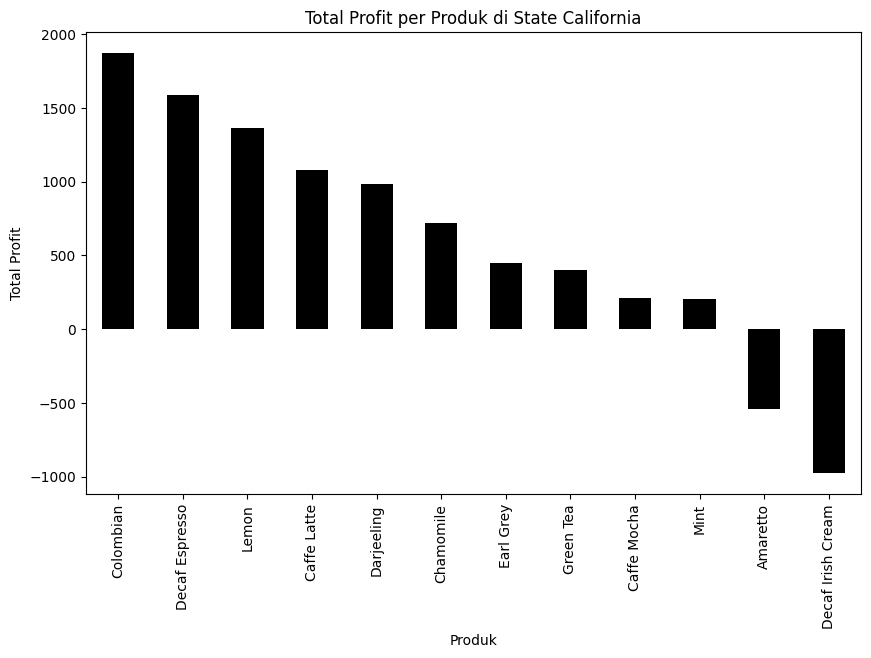

In [37]:
# Membuat plot bar untuk visualisasi total keuntungan per produk di California
plt.figure(figsize=(10, 6))
produk_tertinggi_ca.plot(kind='bar', color='black')
plt.title('Total Profit per Produk di State California')
plt.xlabel('Produk')
plt.ylabel('Total Profit')
plt.show()

Insight: 

Produk dengan profit paling tinggi di California adalah Colombian

In [38]:
# New York
# Filter produk di State New York
df_ny = df[df['state'] == 'New York']
# Mengelompokkan data berdasarkan produk dan menghitung total keuntungan di CA
total_keuntungan_per_produk_ny = df_ny.groupby('product')['profit'].sum()
# Mengurutkan nilai keuntungan secara descending dan mengambil produk pertama
produk_tertinggi_ny = total_keuntungan_per_produk_ny.sort_values(ascending=False)
produk_tertinggi_ny

product
Regular Espresso    2802
Colombian           1873
Lemon               1595
Earl Grey            978
Darjeeling           716
Green Tea            440
Mint               -1279
Caffe Mocha        -1560
Name: profit, dtype: int64

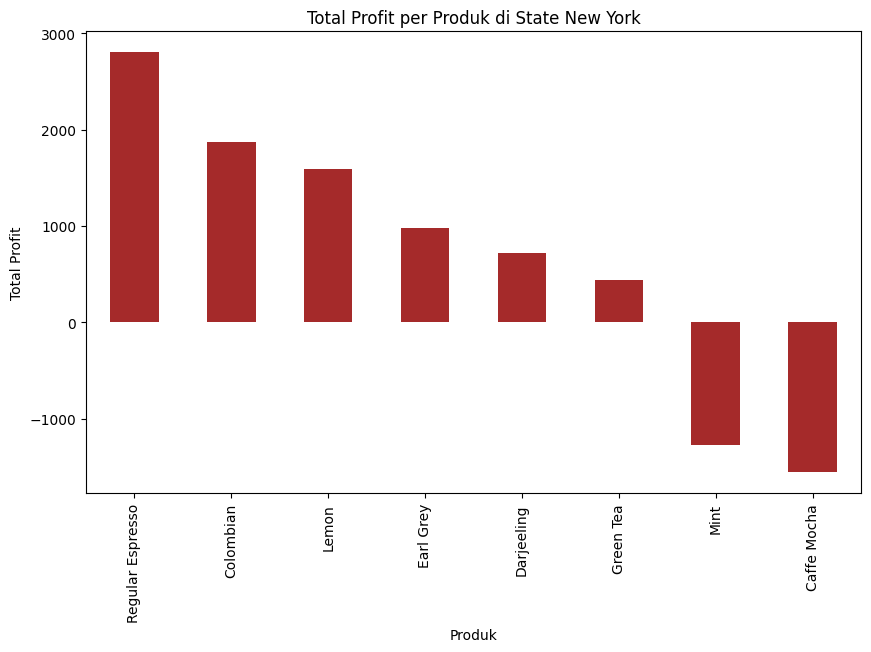

In [39]:
# Membuat plot bar untuk visualisasi total keuntungan per produk di New York
plt.figure(figsize=(10, 6))
produk_tertinggi_ny.plot(kind='bar', color='brown')
plt.title('Total Profit per Produk di State New York')
plt.xlabel('Produk')
plt.ylabel('Total Profit')
plt.show()

Insight: 

Produk dengan profit paling tinggi di New York adalah Regular Espresso 

In [40]:
# Iowa
# Filter produk di State Iowa
df_io = df[df['state'] == 'Iowa']
# Mengelompokkan data berdasarkan produk dan menghitung total keuntungan di CA
total_keuntungan_per_produk_io = df_io.groupby('product')['profit'].sum()
# Mengurutkan nilai keuntungan secara descending dan mengambil produk pertama
produk_tertinggi_io = total_keuntungan_per_produk_io.sort_values(ascending=False)
produk_tertinggi_io

product
Chamomile            1580
Earl Grey            1422
Darjeeling           1078
Lemon                 855
Decaf Espresso        233
Caffe Mocha           127
Amaretto               82
Colombian              49
Decaf Irish Cream     -14
Name: profit, dtype: int64

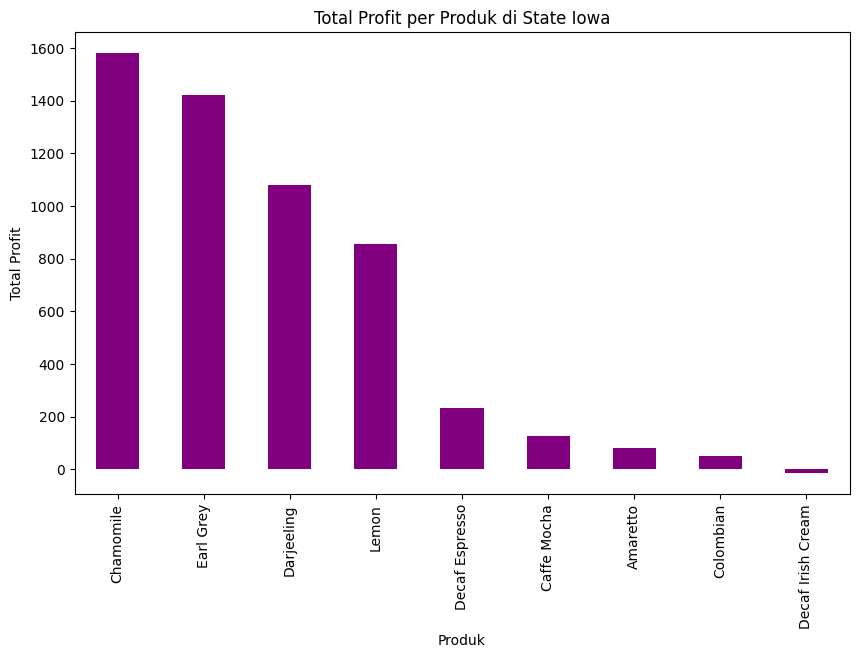

In [41]:
# Membuat plot bar untuk visualisasi total keuntungan per produk di Iowa
plt.figure(figsize=(10, 6))
produk_tertinggi_io.plot(kind='bar', color='purple')
plt.title('Total Profit per Produk di State Iowa')
plt.xlabel('Produk')
plt.ylabel('Total Profit')
plt.show()

Insight: 

Produk dengan profit paling tinggi di iowa adalah Chamomile

In [42]:
# Colorado
# Filter produk di State Colorado
df_co = df[df['state'] == 'Colorado']
# Mengelompokkan data berdasarkan produk dan menghitung total keuntungan di Colorado
total_keuntungan_per_produk_co = df_co.groupby('product')['profit'].sum()
# Mengurutkan nilai keuntungan secara descending dan mengambil produk pertama
produk_tertinggi_co = total_keuntungan_per_produk_co.sort_values(ascending=False)
produk_tertinggi_co

product
Amaretto             981
Decaf Irish Cream    716
Chamomile            711
Green Tea            522
Caffe Mocha          447
Decaf Espresso       400
Mint                 216
Colombian            206
Earl Grey            204
Darjeeling            84
Lemon                -37
Name: profit, dtype: int64

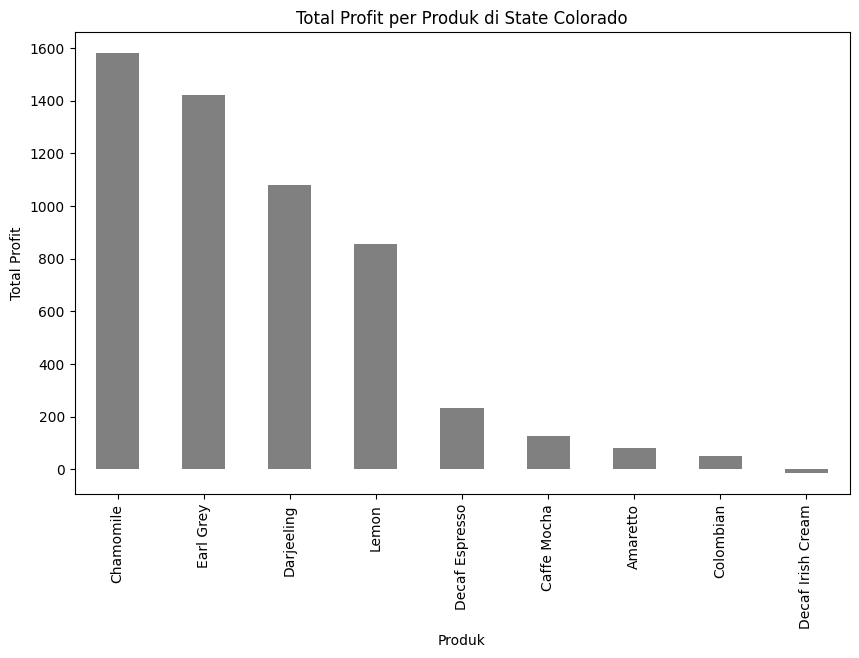

In [43]:
# Membuat plot bar untuk visualisasi total keuntungan per produk di Colorado
plt.figure(figsize=(10, 6))
produk_tertinggi_io.plot(kind='bar', color='grey')
plt.title('Total Profit per Produk di State Colorado')
plt.xlabel('Produk')
plt.ylabel('Total Profit')
plt.show()

Insight: 

Produk dengan profit paling tinggi di Colorado adalah Chamomile

## 7.6-Dimana state paling banyak mendapatkan profit dari produk colombian?

In [44]:
# Filter data hanya untuk produk Colombian
df_colombian = df[df['product'] == 'Colombian']
# Mengelompokkan data berdasarkan 'State' dan menghitung total profit produk Colombian di setiap state
totalprofit_colombian_tiap_state = df_colombian.groupby('state')['profit'].sum()
# Mengurutkan DataFrame berdasarkan total profit tiap state
df_sorted_by_profitcolombian = totalprofit_colombian_tiap_state.sort_values(ascending=False)
df_sorted_by_profitcolombian

state
Massachusetts    2638
New York         1873
California       1871
Texas            1359
Illinois         1125
Connecticut       850
Oklahoma          524
Florida           496
Washington        407
Louisiana         340
Missouri          246
Ohio              209
Colorado          206
New Hampshire     180
New Mexico        174
Utah              174
Wisconsin         135
Oregon             89
Iowa               49
Nevada            -13
Name: profit, dtype: int64

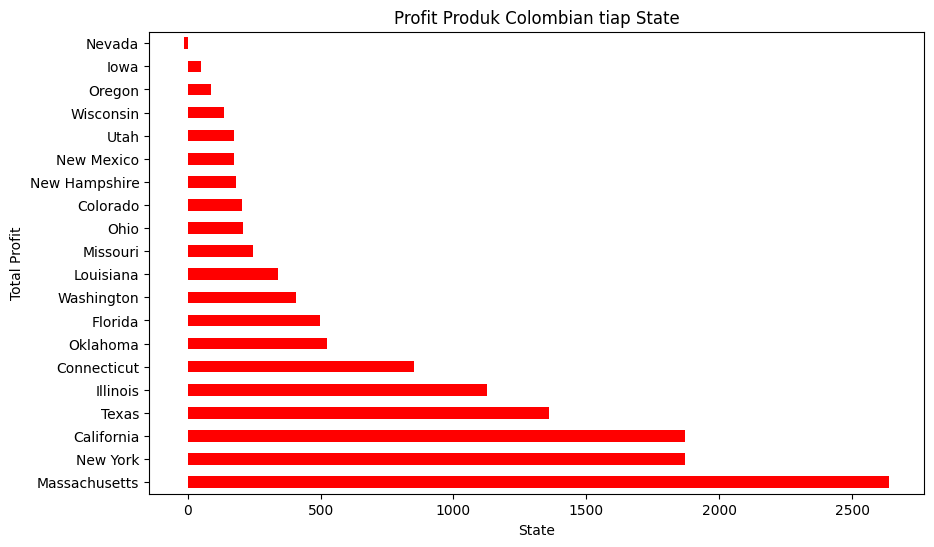

In [45]:
# Membuat plot bar untuk visualisasi profit produk Colombian tiap state
plt.figure(figsize=(10, 6))
df_sorted_by_profitcolombian.plot(kind='barh', color='Red')
plt.title('Profit Produk Colombian tiap State')
plt.xlabel('State')
plt.ylabel('Total Profit')
plt.show()

Insight:

State paling banyak memberikan profit pada produk Colombian adalah Massachusetts, 4 state selanjutnya paling banyak memberikan profit adalah New York, California, Texas & Illinois.

## 7.7- Bulan apa produk paling banyak profit

In [46]:
# Mengekstrak bulan dari kolom 'Date'
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
# Mengelompokkan data berdasarkan bulan dan menghitung total profit per bulan
total_profit_per_bulan = df.groupby('month')['profit'].sum().sort_values(ascending=False)
total_profit_per_bulan

month
8     7888
6     6230
2     5956
7     5683
1     5529
5     4817
9     4802
10    4768
12    4766
3     4686
11    4661
4     4525
Name: profit, dtype: int64

Text(0, 0.5, 'Total Profit')

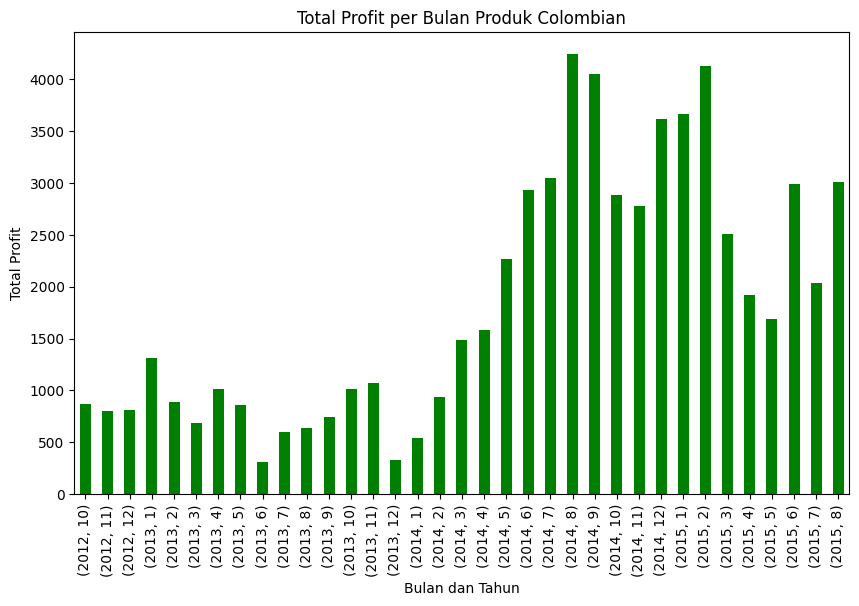

In [47]:
# Membuat plot bar untuk visualisasi total profit per bulan
plt.figure(figsize=(10, 6))
total_profit_per_bulan = df.groupby(['year', 'month'])['profit'].sum()
total_profit_per_bulan.plot(kind='bar', color='green')
plt.title('Total Profit per Bulan Produk Colombian')
plt.xlabel('Bulan dan Tahun')
plt.ylabel('Total Profit')

Insight:

Bulan paling banyak mendapatkan profit pada bulan Agustus tahun 2014

In [48]:
# Menghitung total profit pada tahun 2015
total_profit_2015 = df[df['year'] == 2015]['profit'].sum()

print("Total Profit Tahun 2015:", total_profit_2015)


Total Profit Tahun 2015: 21954


## 7.8-Statistik Inferential:

Apakah memang negara New York dan California yang memiliki profit paling tinggi pada produk colomnian tersebut memiliki perbedaan yg signifikan, coba cek menggunakan two sampel

In [49]:
# Melakukan uji Hypothesis Testing dengan two sample untuk kedua negara
new = df_colombian[df_colombian['state'] == 'New York']['profit']
cal = df_colombian[df_colombian['state'] == 'California']['profit']

t_statistic, p_value = stats.ttest_ind(new, cal)

In [50]:
# panggin uji Hypothesis Testing
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

T-Statistic: 0.00828346625515706
P-Value: 0.9935537487546138


Insight:

Karena p-value lebih lebih dari 0,05 maka H0 gagal ditolak sehingga tidak ada perbedaan signifikan antara profit di dua negara

## 7.8.1 -Statistik Inferential: perbedaan keuntungan antara produk Colombian dan Lemon

In [54]:
# Contoh uji hipotesis: perbedaan keuntungan antara produk Colombian dan Lemon
colombian_profit = df[df['product'] == 'Colombian']['profit']
lemon_profit = df[df['product'] == 'Lemon']['profit']

t_statistic, p_value = stats.ttest_ind(colombian_profit, lemon_profit)

In [55]:
# panggin uji Hypothesis Testing
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

T-Statistic: 3.212327336942684
P-Value: 0.001498481193781478


**Insight:**
1. T-Statistic: Nilai t-statistik adalah ukuran seberapa jauh perbedaan antara rata-rata kedua kelompok dalam satuan standar. Semakin besar nilainya, semakin besar perbedaannya relatif terhadap variasi dalam data.

Dalam contoh ini, nilai t-statistik adalah 3.212327336942684. Ini menunjukkan bahwa perbedaan antara rata-rata keuntungan produk Colombian dan Lemon adalah sekitar 3,21 kali lebih besar dari variasi dalam data.

2. P-Value: Nilai p-value adalah probabilitas bahwa perbedaan yang diamati antara dua kelompok adalah hasil dari kesalahan sampling. Nilai p-value yang lebih kecil menunjukkan bahwa perbedaan antara dua kelompok lebih mungkin nyata daripada hanya hasil dari variasi acak.

Dalam contoh ini, p-value adalah 0.001498481193781478. Nilai ini cukup rendah, jauh di bawah tingkat signifikansi yang umumnya digunakan (misalnya 0.05). Artinya, terdapat bukti yang cukup kuat untuk menolak hipotesis nol bahwa tidak ada perbedaan antara keuntungan produk Colombian dan Lemon. Sebaliknya, kita dapat menerima hipotesis alternatif bahwa ada perbedaan signifikan dalam keuntungan antara kedua produk tersebut.


3. Dalam contoh ini, nilai p-value yang diberikan adalah 0.001498481193781478. Ini berarti bahwa jika hipotesis nol benar (yaitu tidak ada perbedaan signifikan antara keuntungan produk Colombian dan Lemon), maka kemungkinan mengamati perbedaan yang kita lihat dalam data adalah 0.001498481193781478, atau sekitar 0,15%. Karena nilai p-value ini sangat rendah, jauh di bawah tingkat signifikansi yang umumnya digunakan (misalnya 0.05), kita menyimpulkan bahwa ada bukti yang cukup kuat untuk menolak H0.

Hipotesis nol (H0) dalam konteks ini menyatakan bahwa tidak ada perbedaan signifikan dalam keuntungan antara produk Colombian dan Lemon. Dengan demikian, dengan memiliki nilai p-value yang rendah, kita menolak H0 dan menerima hipotesis alternatif bahwa ada perbedaan yang signifikan dalam keuntungan antara kedua produk tersebut. Artinya, perbedaan yang diamati dalam keuntungan antara produk Colombian dan Lemon tidak mungkin hanya hasil dari variasi acak, melainkan memang ada perbedaan yang nyata di antara keduanya.

## 7.9-Statistik Deskriptif dengan metode Central Tendency

Mean: Rata-rata profit pada produk colombian? 

Median: Median profit pada produk columbian?

Modus: profit pada produk columbian


In [51]:
print('Rata rata profit pada produk colombian:', df_colombian['profit'].mean())
print('Median profit pada produk columbian:',df_colombian['profit'].median())
print('Mode profit pada produk columbian:',df_colombian['profit'].mode().values[0])

Rata rata profit pada produk colombian: 107.76666666666667
Median profit pada produk columbian: 47.0
Mode profit pada produk columbian: 27


# 8-Conclusion

1. Produk paling banyak terjual yaitu Colombian dan produk paling profit yaitu Colombian 

2. State paling banyak menjual produk adalah California dan state paling banyak memberikan profit adalah Illionis

3. Dari 5 state paling banyak profit, produk apa yang paling profit dari masing-masing state:
Illinois: Caffe Mocha 
california: colombian
New York: Regular Espresso
iowa: Chamomile
Colorado: Chamomile

Dapat disimpukan bahwa dari 5 state paling profit memiliki produk paling profit yang berbeda beda, mereka memiliki menu best seller mereka masing-masing, sehingga belum tentu dari 5 state paling profit produk paling profitnya adalaha Colombian

4. Bulan paling banyak mendapatkan profit yaitu pada bulan Agustus tahun 2014 
State paling banyak mendapatkan profit dari produk colombian adalah Massachusetts

5. Karena p-value lebih lebih dari 0,05 maka H0 gagal ditolak sehingga tidak ada perbedaan signifikan antara profit di dua negara

6. Sehingga karena kita telah mengetahui state yang paling profit dan produk paling profit kita bisa lebih fokus melakuakan penjualan dan meningkatkan promosi baik secara offline dan online, bisa juga memberikan promo-promo yang banyak 

7. Untuk meningktakan  profit 10% maka dapat dilakukan banyak penjualan pada produk paling profit dan state paling profit, bisa memberikan promosi yang menarik, kolaborasi dengan influencer utk meningkatkan penjualan, promosi di sosmed, dan fokus pada produk paling profit saja, yang produk mendpatakan prodfit paling renda nantinya bisa dihapuskan untuk mengurangi biaya operasional dan lainnya.